# Modeling - XGBoost
(Using the top **10** features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

# Instantiating the scaler
scaler = StandardScaler()

# Scaling the features and not the class labels
features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

# Reattaching the class labels back to the scaled data
df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [22]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## XGBoost Modeling

In [7]:
# Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import xgboost as xgb

In [8]:
# Instatiating the model classifier
clf = xgb.XGBClassifier()

# Fitting to the Data
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBoost
Training Accuracy: 0.48299760670123654 		 Testing Accuracy: 0.45154053245587794


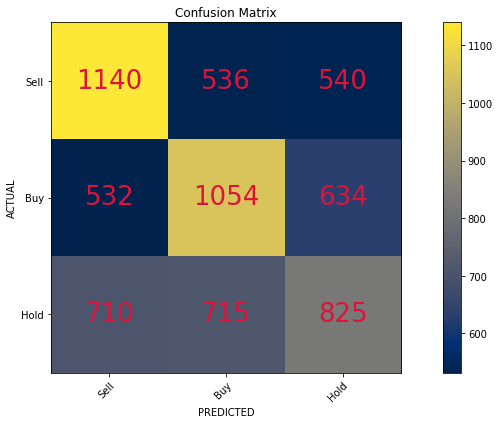

In [9]:
# Printing Results
print("XGBoost")

# Modeling and Confusion Matrix
mod_results(clf, X_train, X_test, y_train, y_test)

## XGBoost - Results
with the scaled top **10** features

In [10]:
# XGBoost
# Training Accuracy: 0.48299760670123654 		 Testing Accuracy: 0.45154053245587794

### RandomizedSearchCV - XGBoost

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Parameters to search through
params = {"booster": ["gbtree"],
          "eta": [.1, .3, .6, .9],
          "gamma": [0, 1],
          "n_estimators": [50, 100, 200, 500],
          "grow_policy": ['depthwise', 'lossguide']}

In [28]:
# Randomly implementing the parameters chosen
ran_search = RandomizedSearchCV(clf, params, n_iter=5, cv=3, verbose=5)

%timeit ran_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree, score=0.4450364554122266, total=   6.3s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree, score=0.44523909690085545, total=   6.2s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.3, booster=gbtree, score=0.4468443197755961, total=   6.0s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.0s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4450364554122266, total=   9.1s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.4s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.44523909690085545, total=   6.6s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4468443197755961, total=   7.9s
[CV] n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.44447560291643295, total=  24.2s
[CV] n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.44215397559949515, total=  24.4s
[CV] n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=200, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.44754558204768585, total=  27.2s
[CV] n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbt

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.44447560291643295, total=  13.2s
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.4443977001823026, total=  11.2s
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.1s remaining:    0.0s


[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.1, booster=gbtree, score=0.4485273492286115, total=  13.9s
[CV] n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.3s remaining:    0.0s


[CV]  n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree, score=0.44447560291643295, total=  14.8s
[CV] n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   54.3s remaining:    0.0s


[CV]  n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree, score=0.4443977001823026, total=  12.1s
[CV] n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree 
[CV]  n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.9, booster=gbtree, score=0.4485273492286115, total=  10.6s
[CV] n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.4364834548513741, total=  55.8s
[CV] n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.43850792315243303, total=  58.6s
[CV] n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.44137447405329594, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=g

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  8.3min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.4450364554122266, total=   6.4s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.44523909690085545, total=   6.6s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.4468443197755961, total=   6.0s
[CV] n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.4364834548513741, total= 1.1min
[CV] n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.43850792315243303, total= 1.1min
[CV] n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=500, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.44137447405329594, total= 1.2min
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4450364554122266, total=   5.5s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.44523909690085545, total=   5.5s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4468443197755961, total=   5.7s
[CV] n_estimators=50, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.2min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4450364554122266, total=   5.6s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.44523909690085545, total=   5.8s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4468443197755961, total=   5.5s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.3s remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4406898485698261, total= 1.0min
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.4431356051044734, total=  58.0s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=gbtree, score=0.44922861150070126, total= 1.1min
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 
[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4406898485698261, total=  56.8s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 
[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4431356051044734, total=  24.0s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 
[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.44922861150070126, total=  21.8s
[CV] n_estimators=50, grow_policy=lossguide, gamma=1, eta=0.3, booster=gb

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.5min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4406898485698261, total=  22.6s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.0s remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4431356051044734, total=  22.1s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.7s remaining:    0.0s


[CV]  n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.44922861150070126, total=  22.6s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.4448962422882782, total=   2.4s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.44523909690085545, total=   2.4s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.4479663394109397, total=   2.5s
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.44447560291643295, total=   5.3s
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.4443977001823026, total=   4.8s
[CV] n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=100, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.4485273492286115, total=   4.9s
[CV] n_estimators=500, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtr

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  7.3min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.4450364554122266, total=   7.5s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.44523909690085545, total=   6.9s
[CV] n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.8s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=depthwise, gamma=1, eta=0.6, booster=gbtree, score=0.4468443197755961, total=   6.8s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.7s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.4448962422882782, total=   7.4s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.3s remaining:    0.0s


[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.44523909690085545, total=   6.8s
[CV] n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree 
[CV]  n_estimators=50, grow_policy=lossguide, gamma=0, eta=0.1, booster=gbtree, score=0.4479663394109397, total=   6.5s
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree, score=0.4406898485698261, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree, score=0.4431356051044734, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.6, booster=gbtree, score=0.44922861150070126, total= 1.1min
[CV] n_estimators=50, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtre

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.9min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree, score=0.44447560291643295, total=  28.9s
[CV] n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s


[CV]  n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree, score=0.44215397559949515, total=  27.4s
[CV] n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.7s remaining:    0.0s


[CV]  n_estimators=200, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree, score=0.44754558204768585, total=  26.6s
[CV] n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree, score=0.4443353897924846, total=  13.1s
[CV] n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree, score=0.44594026083298277, total=  13.2s
[CV] n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree 
[CV]  n_estimators=100, grow_policy=lossguide, gamma=1, eta=0.3, booster=gbtree, score=0.44866760168302944, total=  12.8s
[CV] n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.4448962422882782, total=   6.8s
[CV] n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.44523909690085545, total=   7.1s
[CV] n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree 
[CV]  n_estimators=50, grow_policy=depthwise, gamma=0, eta=0.6, booster=gbtree, score=0.4479663394109397, total=   6.9s
[CV] n_estimators=100, grow_policy=lossguide, gamma=0, eta=0.3, booster=gbtree

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.8min finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree, score=0.4406898485698261, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree, score=0.4431356051044734, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.9, booster=gbtree, score=0.44922861150070126, total= 1.0min
[CV] n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.4443353897924846, total=  12.1s
[CV] n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.4min remaining:    0.0s


[CV]  n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.44594026083298277, total=  12.2s
[CV] n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree 
[CV]  n_estimators=100, grow_policy=depthwise, gamma=1, eta=0.9, booster=gbtree, score=0.44866760168302944, total=  12.3s
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree, score=0.4406898485698261, total=  57.7s
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree, score=0.4431356051044734, total= 1.0min
[CV] n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree 
[CV]  n_estimators=500, grow_policy=lossguide, gamma=1, eta=0.1, booster=gbtree, score=0.44922861150070126, total=  60.0s
[CV] n_estimators=500, grow_policy=depthwise, gamma=1, eta=0.1, booster=

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  9.8min finished


6min 39s ± 1min 55s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using tuned parameters on XGBoost

In [29]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Training Score: 0.5115550515286592
Mean Testing Score: 0.4781470574486982

Best Parameter Found:


{'n_estimators': 100,
 'grow_policy': 'depthwise',
 'gamma': 1,
 'eta': 0.9,
 'booster': 'gbtree'}

XGBoost with tuned Parameters
Training Accuracy: 0.4781470574486982 		 Testing Accuracy: 0.4554122265844083


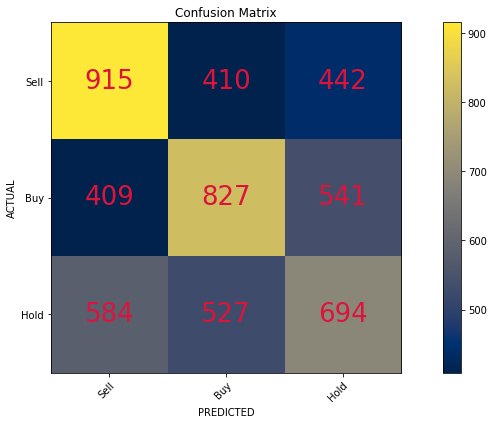

In [30]:
# Instatiating the model classifier with GridSearch's best parameters
clf = ran_search.best_estimator_

# Fitting the model
clf.fit(X_train, y_train)

# Printing Results
print("XGBoost with tuned Parameters")
mod_results(clf, X_train, X_test, y_train, y_test)

#### Compared to both the Top 5 and Top 20 classifiers, selecting the top 10 remains the best option.

## Saving the Final Model

In [31]:
from joblib import dump

dump(clf, "classifier_model.joblib")

['classifier_model.joblib']